In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000720005"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000720005
SIC,6211
Description,"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES"
Name,RAYMOND JAMES FINANCIAL INC
Ticker,RJF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,66.0,2.360364e+01,9.329681e+00,1.188000e+01,1.598250e+01,2.006000e+01,3.054000e+01,4.534000e+01
interest income,5.0,2.904528e+08,3.113301e+07,2.488460e+08,2.713420e+08,2.920760e+08,3.160000e+08,3.240000e+08
net income,63.0,9.464735e+07,6.240186e+07,6.093000e+06,4.794700e+07,7.635000e+07,1.256755e+08,2.627480e+08
net interest income,21.0,1.057573e+08,2.374221e+07,7.823800e+07,8.519700e+07,9.985700e+07,1.236870e+08,1.564920e+08
total revenue,69.0,1.012027e+09,4.398006e+08,3.504970e+08,6.958330e+08,8.389260e+08,1.310778e+09,2.004000e+09


# Plots

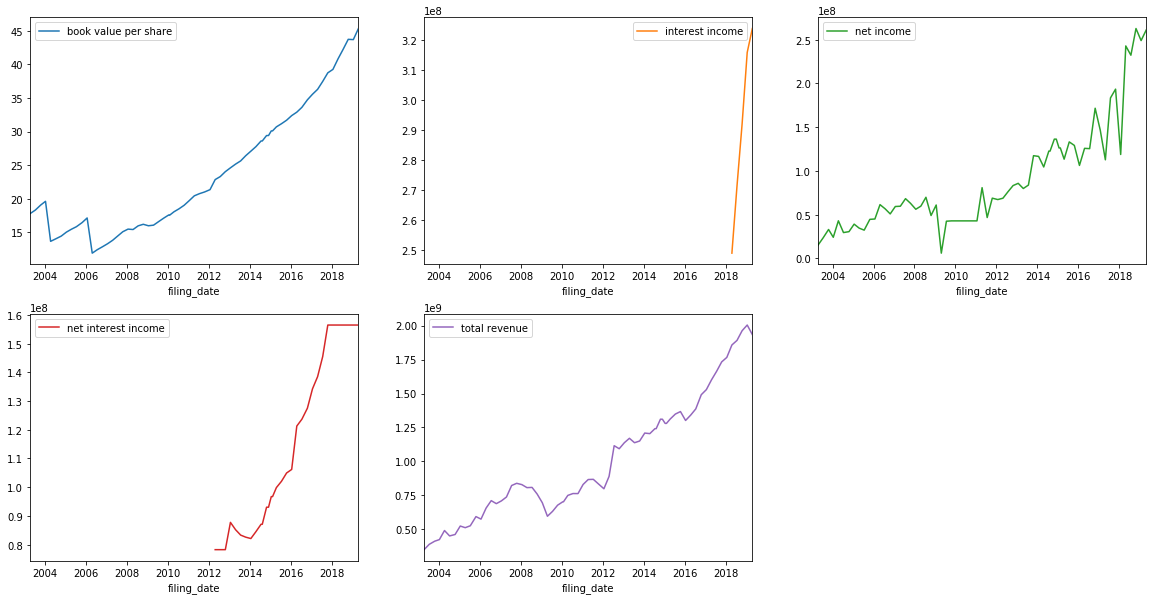

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000720005 interest income            2003Q1 to 2017Q4: 60 periods  missing   
           net income                  2009Q4 to 2010Q4: 5 periods  missing   
           net interest income        2003Q1 to 2011Q4: 36 periods  missing   
           net interest income         2012Q2 to 2012Q3: 2 periods  missing   
           net interest income         2017Q4 to 2019Q1: 6 periods  missing   
           provision for loan losses                          None    empty   

                                                 message  
cik        item                                           
0000720005 interest income                Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses  No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()